# 01 - Naive Bayesian - Gaussian - Solution

===Task===

- Generate a 2 class data using sklearn.
- Put Gaussian Naive Bayesian Classification into class
- Fit the model on the data then calculate accuracy accordingly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### 1) Generate a 2 class data using sklearn

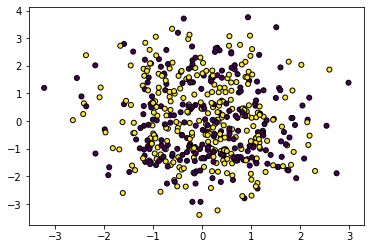

In [2]:
X, y = make_classification(n_samples=500, n_features=10, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

# look at the data...it is likely not linearly separable!

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### 2) Put Gaussian Naive Bayesian Classification into class

In [5]:
class NaiveGaussian_Binary():
    
    def fit(self, X_train, y_train): # fit the data with X_train and y_train
        
        # calculate the mean and std for each feature for each class
        n = X_train.shape[1]
        self.classes = np.unique(y_train)
        self.k = len(self.classes) # number of classes
        mean = np.zeros((self.k, n))
        std = np.zeros((self.k, n))
        
        for label in self.classes:
            mean[label, :] = X_train[y_train==label].mean(axis=0)
            std[label, :]  = X_train[y_train==label].std(axis=0)
        assert mean.shape == (self.k, X_train.shape[1])
        assert std.shape == (self.k, X_train.shape[1])
        self.mean = mean
        self.std = std
    
        # Calculate the prior p(y)
        m = {}
        sum_m = 0
        for label in self.classes:
            m[label] = len(X_train[y_train==label])
            sum_m += m[label]
        
        self.priors = {}
        sum_priors = 0
        for label in self.classes:
            self.priors[label] = m[label] / sum_m
            sum_priors += self.priors[label]
            
        assert sum_priors == 1, "sum of probability not equal to 1"
        
    def gaussian_pdf(self, X, mean, std):
        left = 1 / (np.sqrt(2 * np.pi) * std)
        e = (X - mean) ** 2 / (2 * (std ** 2))
        right = np.exp(-e)
        return left*right
    
    def predict(self, X_test):
        
        likelihoods = {}
        for idx,label in enumerate(self.classes):
            likelihoods[label] = self.gaussian_pdf(X_test, self.mean[idx, :], self.std[idx, :])
            assert likelihoods[label].shape == (X_test.shape[0], X_test.shape[1]), "Shape is wrong for pdf!"
#         print("likelihood", likelihoods[0].shape)
        
        total_likelihoods = {}
        for idx, label in enumerate(self.classes):
            # P(feature1|class0) * P(feature2|class0)
            total_likelihoods[label] = np.prod(likelihoods[label], axis=1)
#         print("total_likelihoods", total_likelihoods[0].shape)
        
        posteriors = np.zeros((X_test.shape[0], self.k))
        for idx, label in enumerate(self.classes):
            # P(class0) * P(feature1|class0) * P(feature2|class0)
            posteriors[:,idx] = self.priors[label] * total_likelihoods[label]
#         print("posteriors", posteriors.shape)
        
        yhat = np.argmax(posteriors, axis = 1)
        
        return yhat

In [6]:
NGB = NaiveGaussian_Binary()

NGB.fit(X_train, y_train)
yhat = NGB.predict(X_test)

### 3) Calculate accuracy accordingly.

In [7]:
from sklearn.metrics import average_precision_score, classification_report
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.8227198817442719
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.90      0.84      0.87        73
           1       0.85      0.91      0.88        77

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150



### This will also work with more than 2 classes

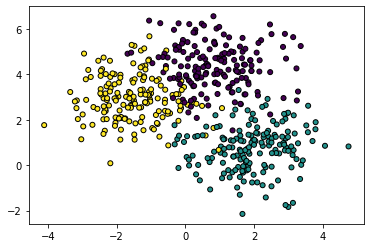

In [8]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
NGB = NaiveGaussian_Binary()

NGB.fit(X_train, y_train)
yhat = NGB.predict(X_test)

In [10]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score

In [11]:
print("=========Average precision score=======")
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
yhat_binarized   = label_binarize(yhat, classes=[0, 1, 2])

n_classes = len(np.unique(y_test))

for i in range(n_classes):
    class_score = average_precision_score(y_test_binarized[:, i], yhat_binarized[:, i])
    print(f"Class {i} score: ", class_score)

=========Average precision score=======
Class 0 score:  0.8385677749360614
Class 1 score:  0.9268671679197994
Class 2 score:  0.8804960317460316
